# Credit Card Fraud Detection

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score, precision_recall_curve, average_precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

# Считывание и EDA

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- всего в датасете 284807 объектов
- данные(V1-V28) нормализованны
- данные соответсвуют
- пропусков нет

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Очень большой дисбаланс классов(среднее значение таргета 0.001727)

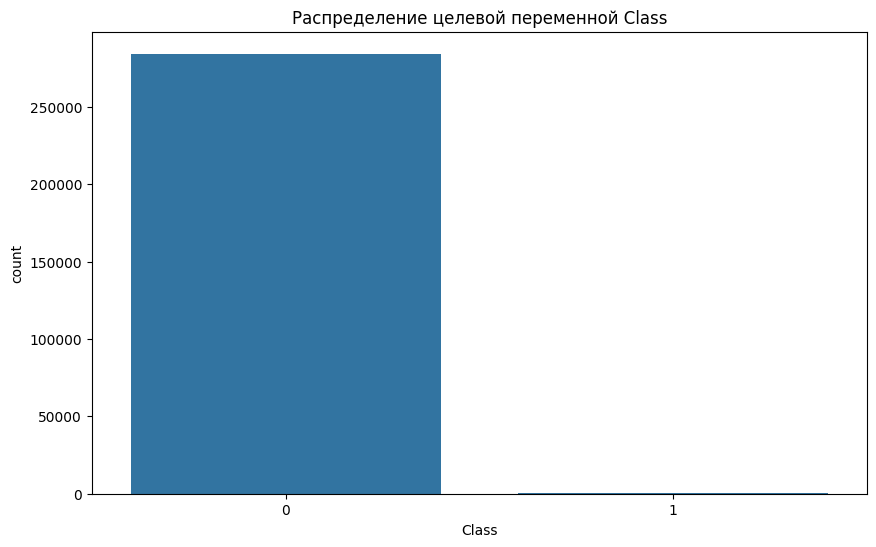

In [5]:
tg = df['Class'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(tg)
plt.title('Распределение целевой переменной Class')

plt.show()

Визуально вижу, что дисбаланс классов очень большой

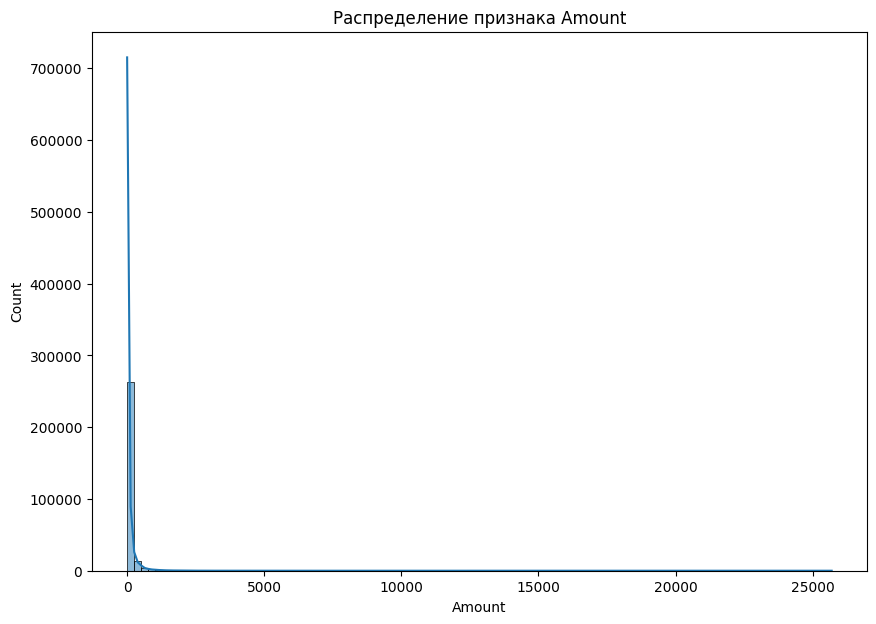

In [6]:
plt.figure(figsize=(10, 7))

sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Распределение признака Amount')

plt.show()

Распределение с правым хвостом, попробуем его логарифмировать и ограничить по 95 процентилю

In [7]:
df['Amount'].quantile(0.95)

np.float64(365.0)

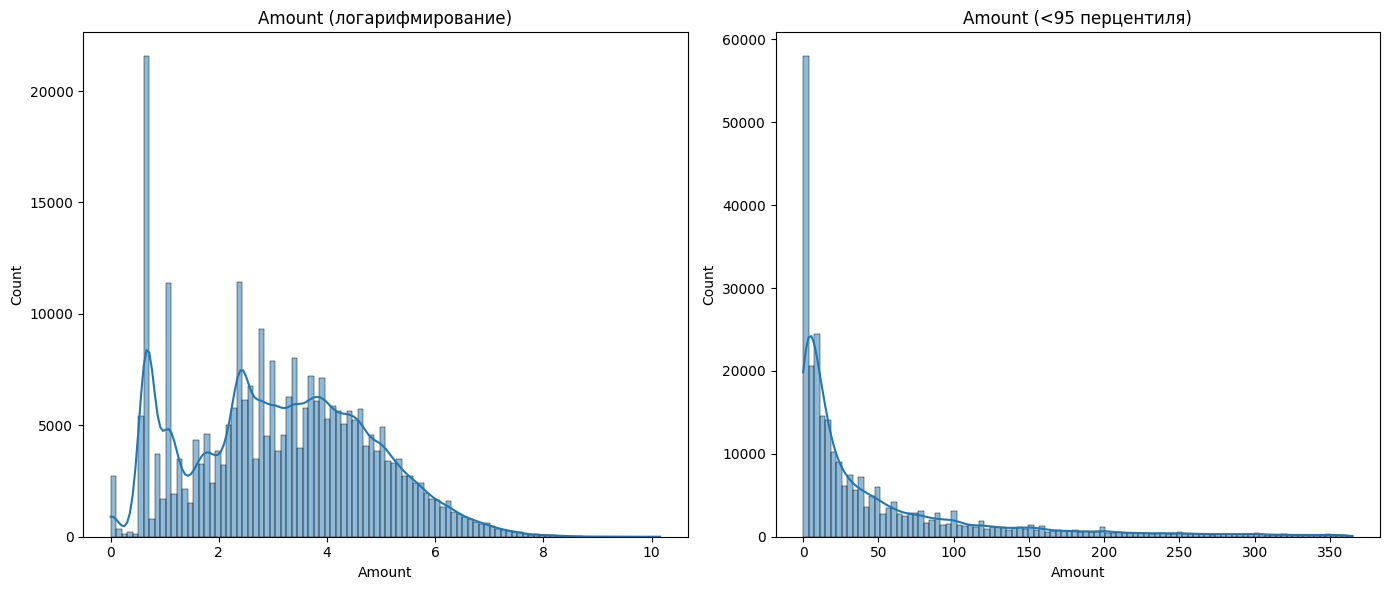

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

sns.histplot(np.log1p(df['Amount']), bins=100, kde=True, ax=axes[0])
axes[0].set_title('Amount (логарифмирование)')

sns.histplot(df[df['Amount'] < 365]['Amount'], bins=100, kde=True, ax=axes[1])
axes[1].set_title('Amount (<95 перцентиля)')

plt.tight_layout()
plt.show()


Логарифмирование справилось лучше

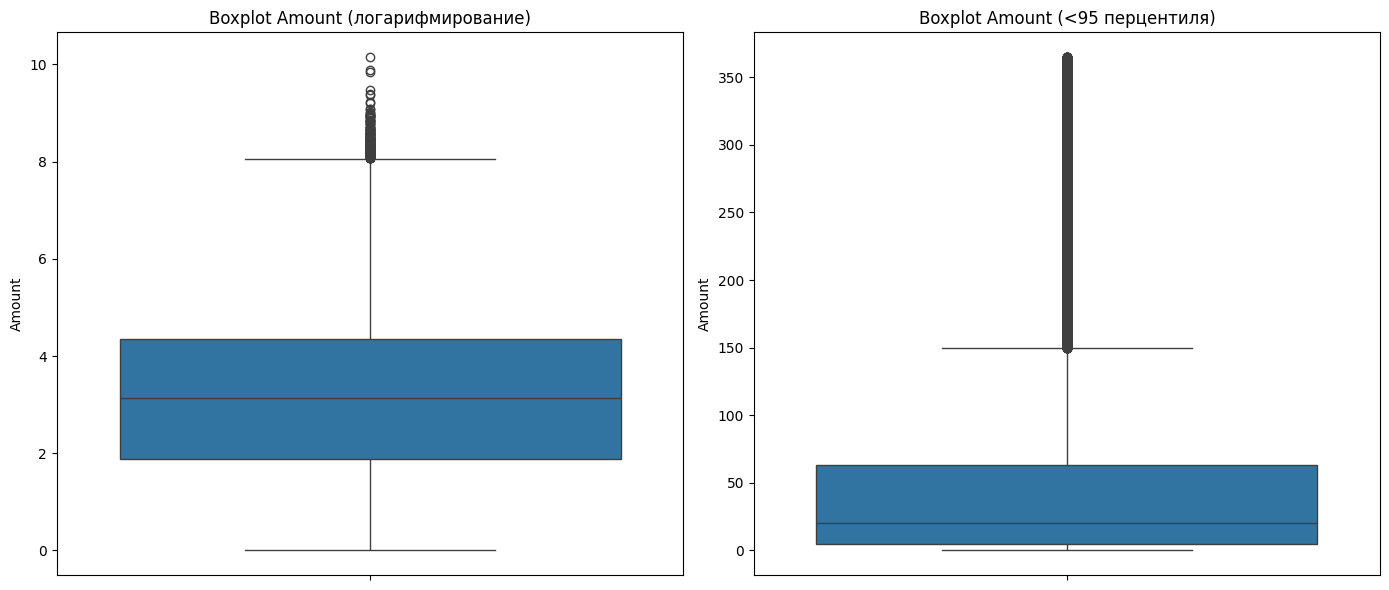

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

sns.boxplot(np.log1p(df['Amount']), ax=axes[0])
axes[0].set_title('Boxplot Amount (логарифмирование)')

sns.boxplot(df[df['Amount'] < 365]['Amount'], ax=axes[1])
axes[1].set_title('Boxplot Amount (<95 перцентиля)')

plt.tight_layout()
plt.show()

Опять же, boxplot у логарифмирования смотрится лучше, так как в нем не так много выбросов и диапазон значений не сильно разбросан

In [10]:
df['Amount_log'] = np.log1p(df['Amount'])

Создадим бинарный признак __is_zero__, который будет показывать, транзакция равна нулю или нет

In [11]:
df['is_zero'] = (df['Amount'] == 0).astype(int)

print(df.groupby('Class')['is_zero'].mean())


Class
0    0.006324
1    0.054878
Name: is_zero, dtype: float64


- Среди обычных операций нулевые суммы встречаются редко (≈0.6%).

- Среди мошеннических операций — встречаются заметно чаще (≈5.5%).

И ещё один признак __is_large__, который показывает крупную транзакцию, крупной буду считать сумму более 365

In [12]:
p95 = df['Amount'].quantile(0.95)
df['is_large'] = (df['Amount'] > p95).astype(int)

df.groupby('is_large')['Class'].mean()

is_large
0    0.001659
1    0.003021
Name: Class, dtype: float64

Мошенничество встречается в 2 раза чаще среди крупных транзакций

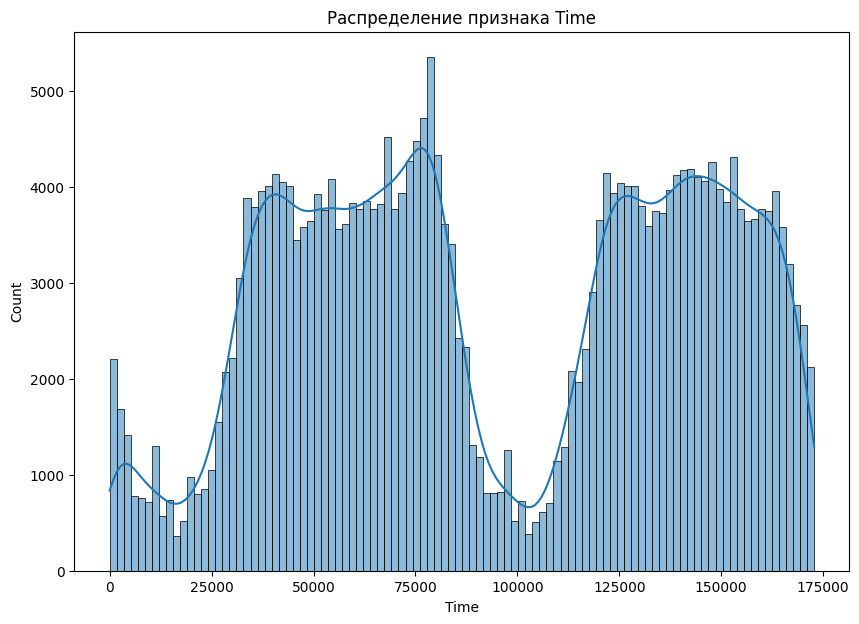

In [13]:
plt.figure(figsize=(10, 7))

sns.histplot(df['Time'], bins=100, kde=True)
plt.title('Распределение признака Time')

plt.show()

Имеются два четко выраженных интервала, в которых количество транзакций наибольшее

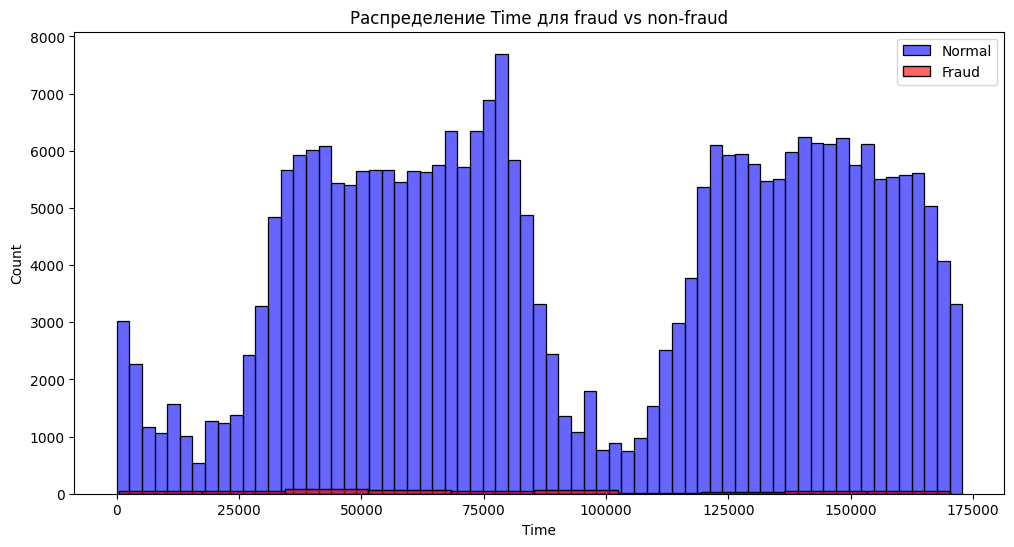

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==0]['Time'], color='blue', label='Normal', alpha=0.6)
sns.histplot(df[df['Class']==1]['Time'], color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Распределение Time для fraud vs non-fraud')
plt.show()

Я бы сказал, что большая часть fraud выделяется в основаниях "холмов" и в переходе после первого "холма"

Преобразуем __Time__ в часы

In [15]:
df['hour'] = (df['Time'] % 86400) // 3600

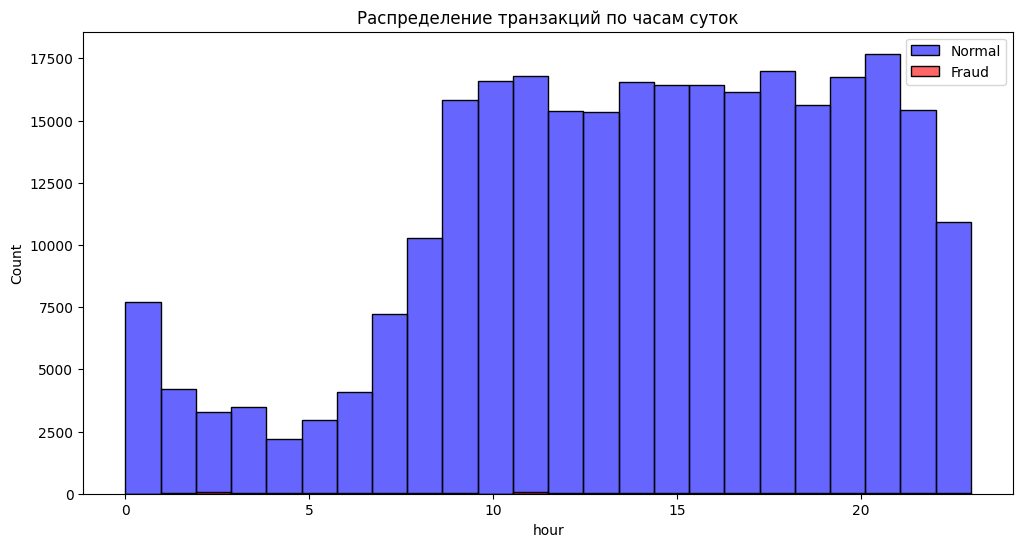

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==0]['hour'], bins=24, color='blue', label='Normal', alpha=0.6)
sns.histplot(df[df['Class']==1]['hour'], bins=24, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Распределение транзакций по часам суток')
plt.show()

Ничего не видно

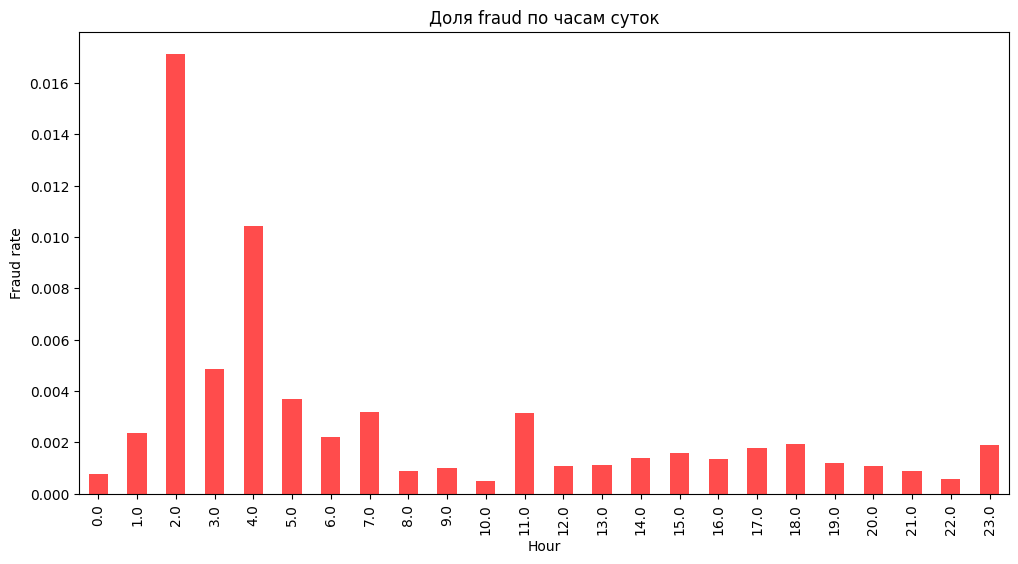

In [17]:
fraud_by_hour = df.groupby('hour')['Class'].mean()

plt.figure(figsize=(12,6))
fraud_by_hour.plot(kind='bar', color='red', alpha=0.7)
plt.title('Доля fraud по часам суток')
plt.ylabel('Fraud rate')
plt.xlabel('Hour')
plt.show()


Вот здесь всё видно замечательно, больше всего fraud от 2 до 7, в 11 и 23 час

Всё-таки fraud чаще ночью, поэтому создадим новый признак __is_night__

In [18]:
df['is_night'] = df['hour'].between(0, 6).astype(int)
df.groupby('is_night')['Class'].mean()


is_night
0    0.001398
1    0.004744
Name: Class, dtype: float64

вероятность мошенничества в 3,5 раза выше ночью

Посмотрим на корреляционную матрицу признаков с целевой переменной

C:\Users\Alexey\AppData\Local\Temp\ipykernel_7824\2447439077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


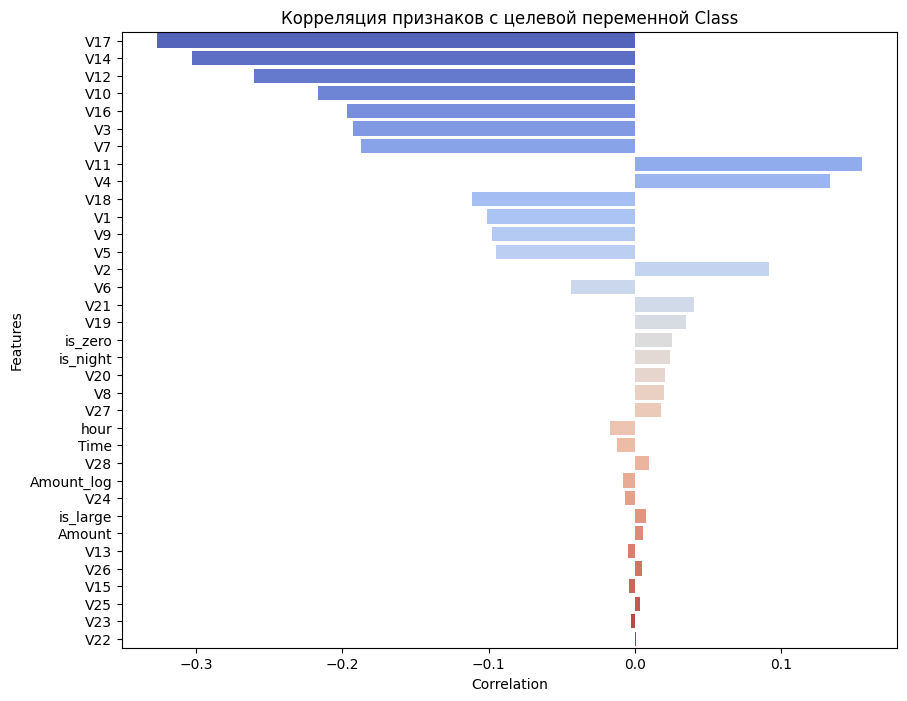

In [19]:
corr = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Корреляция признаков с целевой переменной Class')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

как таковой сильной корреляции нет, максимум 0.3, наши новые переменные __is_zero__, __is_night__ попали в топ-20, а __is_large__ в 10 худших

# Подготовка данных для модели

In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_log', 'is_zero', 'is_large', 'hour', 'is_night'],
      dtype='object')

In [21]:
X = df.drop(columns=['Class', 'Amount', 'Time'])
y = df['Class']

num_features = ['hour', 'Amount_log']  
bin_features = ['is_zero', 'is_large', 'is_night'] 
pca_features = [col for col in df.columns if col.startswith('V')]  

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),  
    ('bin', 'passthrough', bin_features),      
    ('pca', 'passthrough', pca_features)       
])

model = Pipeline([
    ('prep', preprocess),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42))
])

In [24]:
model.fit(X_train, y_train)

lr_proba = model.predict_proba(X_val)[:, 1]
print('ROC-AUC:', roc_auc_score(y_val, lr_proba))

ROC-AUC: 0.971168408978673


In [25]:
prec, rec, thr = precision_recall_curve(y_val, lr_proba)
ap = average_precision_score(y_val, lr_proba)
print(f"Average Precision (PR-AUC) = {ap:.5f}")

Average Precision (PR-AUC) = 0.71043


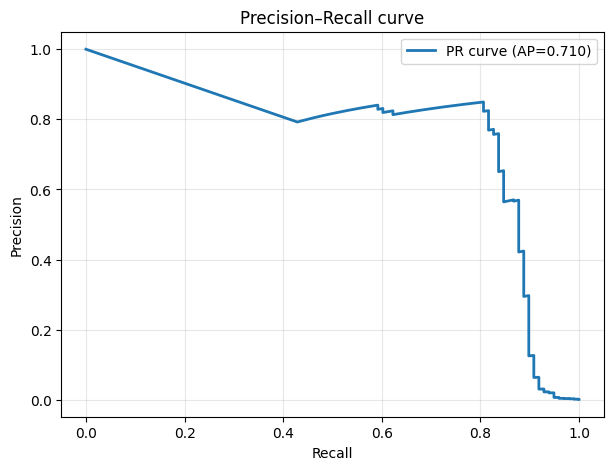

In [26]:
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label=f"PR curve (AP={ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
f1_all = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)

mask = rec[:-1] >= 0.80
idx = np.argmax(np.where(mask, f1_all, -1))
best_thr = thr[idx]

pred = (lr_proba >= best_thr).astype(int)
p = precision_score(y_val, pred)
r = recall_score(y_val, pred)
f1 = f1_score(y_val, pred)

print(f"Best threshold: {best_thr:.6f}")
print(f"Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}")

Best threshold: 1.000000
Precision: 0.8495 | Recall: 0.8061 | F1: 0.8272


In [37]:
def evaluate_model(name, model, X_val, y_val, recall_floor=0.80):
    proba = model.predict_proba(X_val)[:, 1]
    roc = roc_auc_score(y_val, proba)
    ap  = average_precision_score(y_val, proba)

    prec, rec, thr = precision_recall_curve(y_val, proba)

    f1_all = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)

    mask = rec[1:] >= recall_floor
    idx = np.argmax(np.where(mask, f1_all, -1))
    best_thr = thr[idx]

    pred = (proba >= best_thr).astype(int)
    P = precision_score(y_val, pred)
    R = recall_score(y_val, pred)
    F1 = f1_score(y_val, pred)

    print(f"\n[{name}] ROC-AUC={roc:.4f} | PR-AUC(AP)={ap:.4f}")
    print(f"Chosen thr={best_thr:.6f}")
    print(f"Precision={P:.4f} | Recall={R:.4f} | F1={F1:.4f}")

    plt.figure(figsize=(7,5))
    plt.plot(rec, prec, lw=2, label=f"PR curve (AP={ap:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall curve")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return {'roc_auc': roc, 'ap': ap, 'thr': best_thr, 'precision': P, 'recall': R, 'f1': F1}



[RandomForest] ROC-AUC=0.9702 | PR-AUC(AP)=0.8649
Chosen thr=0.308000
Precision=0.9425 | Recall=0.8367 | F1=0.8865


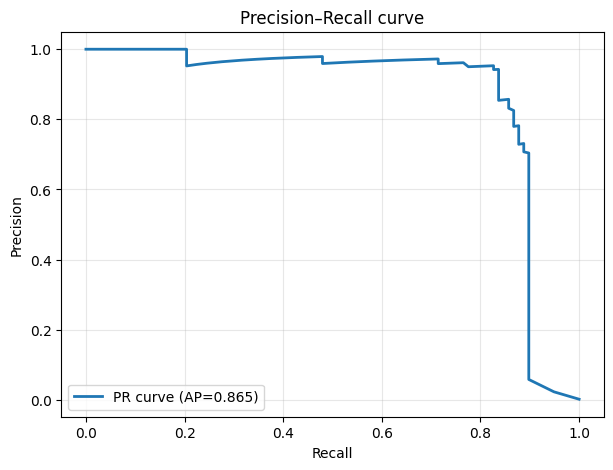

In [38]:
rf = Pipeline([
    ('prep', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    ))
])

rf.fit(X_train, y_train)
rf_metrics = evaluate_model("RandomForest", rf, X_val, y_val, recall_floor=0.80)


[XGBoost] ROC-AUC=0.9776 | PR-AUC(AP)=0.8842
Chosen thr=0.798707
Precision=0.9101 | Recall=0.8265 | F1=0.8663


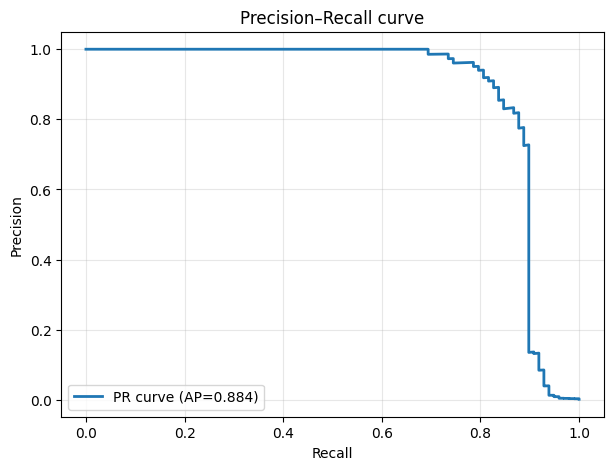

In [39]:
pos = y_train.sum()
neg = (y_train==0).sum()
spw = neg / max(pos, 1)

xgb = Pipeline([
    ('prep', preprocess),
    ('xgb', XGBClassifier(
        n_estimators=800,
        learning_rate=0.05,
        subsample=0.8,
        scale_pos_weight=spw,
        n_jobs=-1,
        random_state=42
    ))
])

xgb.fit(X_train, y_train)
xgb_metrics = evaluate_model("XGBoost", xgb, X_val, y_val, recall_floor=0.80)

# Вывод по задаче «Credit Card Fraud Detection»

В рамках проекта была решена задача классификации транзакций по признаку *мошенническая / немошенническая*.

## Основные шаги работы
1. **Анализ данных (EDA):**
   - Размер выборки: ~285 тыс. транзакций.
   - Целевая переменная (`Class`) крайне несбалансирована: ~0.17% мошеннических операций.
   - Большинство признаков (`V1–V28`) получены методом PCA и уже стандартизированы.
   - Дополнительно проанализированы `Amount` и `Time`.

2. **Feature Engineering:**
   - Созданы новые признаки:  
     - `Amount_log` (логарифмирование суммы),  
     - `is_zero` (нулевая сумма),  
     - `is_large` (крупная транзакция),  
     - `hour` (часы суток),  
     - `is_night` (ночное время).  
   - Новые признаки показали корреляцию с таргетом и улучшили модели.

3. **Обученные модели:**
   - **Logistic Regression (baseline):** ROC-AUC ≈ 0.97, PR-AUC ≈ 0.71.
   - **RandomForest:** ROC-AUC ≈ 0.97, PR-AUC ≈ 0.86.
   - **XGBoost:** ROC-AUC ≈ 0.978, PR-AUC ≈ 0.88.

   | Модель              | ROC-AUC | PR-AUC | Precision | Recall | F1   |
   |---------------------|---------|--------|-----------|--------|------|
   | Logistic Regression | 0.971   | 0.710  | ~0.85     | ~0.81  | ~0.83 |
   | RandomForest        | 0.970   | 0.865  | 0.942     | 0.837  | 0.887 |
   | XGBoost             | 0.978   | 0.884  | 0.910     | 0.827  | 0.866 |

4. **Метрики:**
   - Для оценки использовались ROC-AUC, PR-AUC и F1-score при ограничении `recall ≥ 0.8`.
   - Лучшие модели (RF и XGBoost) достигают:
     - Precision ≈ 0.91–0.94  
     - Recall ≈ 0.83–0.84  
     - F1 ≈ 0.87–0.89  

## Заключение
- Даже простая Logistic Regression показывает высокое качество за счёт информативных признаков.  
- Ансамблевые методы (RandomForest, XGBoost) дают дополнительный прирост качества.  
- Выявлены закономерности: мошеннические транзакции чаще совершаются ночью, а также чаще имеют нулевую или крупную сумму.  
- Для практического применения важно учитывать бизнес-стоимость ошибок: **лучше допустить ложноположительный случай, чем пропустить мошенничество**.  

**Итог:** машинное обучение значительно превосходит простые правила в задаче fraud detection. Построенные модели позволяют находить >80% мошеннических транзакций при точности выше 90%.